In [4]:
# !pip install scikit-learn

  Using cached scipy-1.12.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 660.6 kB/s eta 0:00:17
    --------------------------------------- 0.2/10.6 MB 2.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/10.6 MB 5.5 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/10.6 MB 11.3 MB/s eta 0:00:01
   --------------- ------------------------ 4.1/10.6 MB 18.9 MB/s eta 0:00:01
   -------------------------- ------------- 7.1/10.6 MB 26.8 MB/s eta 0:00:01
   ------------------------------ --------- 8.0/10.6 MB 25.6 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 40.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/302.2 kB ? eta -:--:--
   --------------------------------------- 302.2/302.2 kB 18.2 MB/s eta 0:00:00
   ------------------

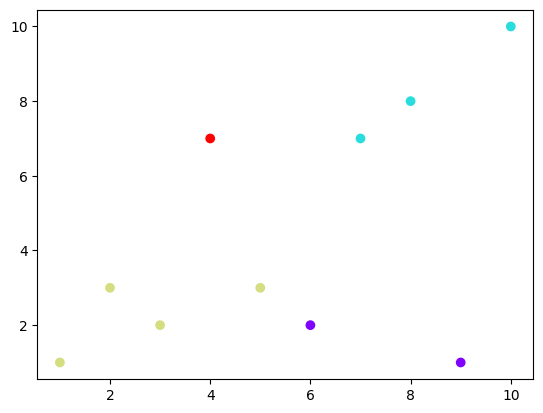

In [8]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import json

BUS_STOP_DATA_PATH = "C:/Users/lukec/Documents/Thesis/BusRouting/FYP-Flexible-Bus/Data/BusStopsMalta/export.json"
f = open(BUS_STOP_DATA_PATH, "r",encoding="utf-8")
data = json.load(f)
elements = data["elements"]

longitudes = []
latitudes = []
for element in elements:
    longitudes.append(element["lon"])
    latitudes.append(element["lat"])

print(len(longitudes))
print(len(latitudes))

data = list(zip(longitudes, latitudes))
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

plt.scatter(longitudes, latitudes, c=kmeans.labels_, cmap='rainbow')